 1.Download the Dataset

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
!unzip /content/drive/MyDrive/Flowers-Dataset.zip

Archive:  /content/drive/MyDrive/Flowers-Dataset.zip
  inflating: flowers/daisy/100080576_f52e8ee070_n.jpg  
  inflating: flowers/daisy/10140303196_b88d3d6cec.jpg  
  inflating: flowers/daisy/10172379554_b296050f82_n.jpg  
  inflating: flowers/daisy/10172567486_2748826a8b.jpg  
  inflating: flowers/daisy/10172636503_21bededa75_n.jpg  
  inflating: flowers/daisy/102841525_bd6628ae3c.jpg  
  inflating: flowers/daisy/10300722094_28fa978807_n.jpg  
  inflating: flowers/daisy/1031799732_e7f4008c03.jpg  
  inflating: flowers/daisy/10391248763_1d16681106_n.jpg  
  inflating: flowers/daisy/10437754174_22ec990b77_m.jpg  
  inflating: flowers/daisy/10437770546_8bb6f7bdd3_m.jpg  
  inflating: flowers/daisy/10437929963_bc13eebe0c.jpg  
  inflating: flowers/daisy/10466290366_cc72e33532.jpg  
  inflating: flowers/daisy/10466558316_a7198b87e2.jpg  
  inflating: flowers/daisy/10555749515_13a12a026e.jpg  
  inflating: flowers/daisy/10555815624_dc211569b0.jpg  
  inflating: flowers/daisy/10555826524_423

In [17]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
import matplotlib.pyplot as plt
batch_size = 32
img_height = 180
img_width = 180
data_dir = "/content/flowers"

2.Image Augmentation

In [8]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [9]:
train_datagen = ImageDataGenerator(rescale = 1./255, horizontal_flip = True, vertical_flip = True, zoom_range = 0.2)

In [10]:
x_train = train_datagen.flow_from_directory(r"/content/drive/MyDrive/flowers", target_size = (64,64) , class_mode = "categorical", batch_size = 100)

Found 4355 images belonging to 5 classes.


3.Create Model

In [11]:
from tensorflow.keras.models import Sequential

In [13]:
from tensorflow.keras.layers import Convolution2D,MaxPooling2D,Flatten,Dense

In [26]:
model = Sequential()

In [18]:
import tensorflow as tf
train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 4317 files belonging to 5 classes.
Using 3454 files for training.


In [19]:
val_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 4317 files belonging to 5 classes.
Using 863 files for validation.


In [20]:
class_names = train_ds.class_names
class_names

['daisy', 'dandelion', 'rose', 'sunflower', 'tulip']

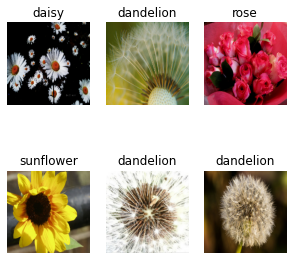

In [22]:
plt.figure(figsize=(5, 5))
for images, labels in train_ds.take(1):
  for i in range(6):
    ax = plt.subplot(2, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

4.Add Layers (Convolution,MaxPooling,Flatten,Dense-(Hidden Layers),Output)

In [27]:
model.add(Convolution2D(32, (3,3), activation = "relu", input_shape = (64,64,3) ))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Flatten())
model.add(Dense(300, activation = "relu"))
model.add(Dense(150, activation = "relu")) #mulitple dense layers
model.add(Dense(5, activation = "softmax")) #output layer

5.Compile The Model

In [28]:
model.compile(loss = "categorical_crossentropy", metrics = ["accuracy"], optimizer = "adam")
len(x_train)

44

6.Fit The Model


In [30]:
#model.fit(x_train, epochs = 15, validation_data = x_test, steps_per_epoch = len(x_train), validation_steps = len(x_test))

model.fit(x_train, epochs = 15, steps_per_epoch = len(x_train))

Epoch 1/15
44/44 [==============================] - 637s 15s/step - loss: 1.1897 - accuracy: 0.4907
Epoch 2/15
44/44 [==============================] - 35s 797ms/step - loss: 1.0953 - accuracy: 0.5635
Epoch 3/15
44/44 [==============================] - 35s 781ms/step - loss: 1.0546 - accuracy: 0.5800
Epoch 4/15
44/44 [==============================] - 36s 821ms/step - loss: 0.9853 - accuracy: 0.6216
Epoch 5/15
44/44 [==============================] - 35s 797ms/step - loss: 0.9397 - accuracy: 0.6342
Epoch 6/15
44/44 [==============================] - 35s 787ms/step - loss: 0.9066 - accuracy: 0.6443
Epoch 7/15
44/44 [==============================] - 35s 779ms/step - loss: 0.8930 - accuracy: 0.6542
Epoch 8/15
44/44 [==============================] - 34s 779ms/step - loss: 0.8492 - accuracy: 0.6668
Epoch 9/15
44/44 [==============================] - 35s 787ms/step - loss: 0.8074 - accuracy: 0.6877
Epoch 10/15
44/44 [==============================] - 35s 785ms/step - loss: 0.8093 - accurac

7.Save The Model


In [31]:
model.save("flowers.h5")

In [40]:
model.save("flowers.m5")#another model to show the accuracy

8.Test The Model

In [32]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np

In [33]:
model = load_model("/content/flowers.h5")

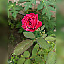

In [34]:
#Testing with a random rose image from Google

img = image.load_img("/content/drive/MyDrive/rose.gif", target_size = (64,64) )
img

In [35]:
x = image.img_to_array(img)
x.ndim

3

In [36]:
x = np.expand_dims(x,axis = 0)
x.ndim

4

In [37]:
pred = model.predict(x)
pred

array([[0., 0., 1., 0., 0.]], dtype=float32)

In [38]:
labels = ['daisy','dandelion','roses','sunflowers','tulips']
labels[np.argmax(pred)]

'roses'

In [51]:
#Testing the alternative model with accuracy
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
batch_size = 32
img_height = 180
img_width = 180
data_dir = "/content/drive/MyDrive/flowers"

sunflower_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/592px-Red_sunflower.jpg"
sunflower_path = tf.keras.utils.get_file('Red_sunflower', origin=sunflower_url)

img = tf.keras.utils.load_img(
    sunflower_path, target_size=(img_height, img_width)
)
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

pred
score = tf.nn.softmax(pred[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

This image most likely belongs to rose with a 40.46 percent confidence.
